In [3]:
import pandas as pd
import numpy as np

# Load the CSV file into a pandas DataFrame
file_path = "aps_failure_training_set.csv"
df = pd.read_csv(file_path)

# Separate the target variable ("class") and the features
y = df["class"]
X = df.drop("class", axis=1)

# Convert all columns to numeric, replacing non-numeric values with NaN
X_numeric = X.apply(pd.to_numeric, errors='coerce')


In [4]:
print(X_numeric.head())

   id  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   1   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   2   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2   3   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   4      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   5   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006    ee_007  \
0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0  157956.0   
1     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   81140.0   
2     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0  158022.0   
3     0.0  ...      240.0      46.0      58.0      44.0      10.0       0.0   
4     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0  311560.0   

     ee_008  ee_009  ef_000  eg_000  
0   73224.0 

In [5]:
mean_values = X_numeric.mean()
std_values = X_numeric.std()

# Define the threshold for identifying outliers
threshold = 2 * std_values

# Identify outliers
outliers = (X_numeric > mean_values + threshold) | (X_numeric < mean_values - threshold)


In [6]:
# Count the number of instances with at least one outlier
instances_with_outliers = outliers.any(axis=1).sum()

# Display the result
print("Number of instances with at least one outlier:", instances_with_outliers)



Number of instances with at least one outlier: 23847


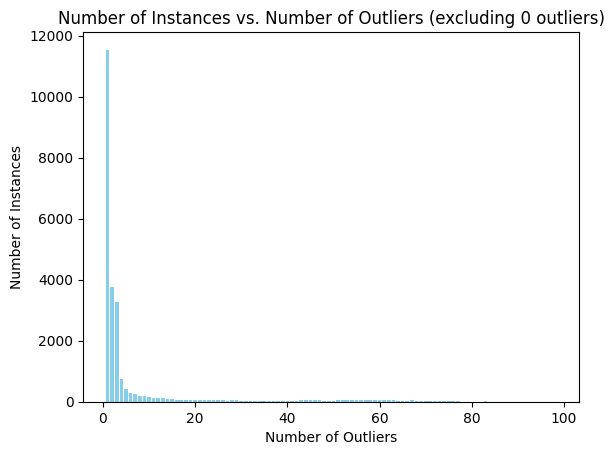

In [7]:
import matplotlib.pyplot as plt

# Count the number of outliers for each instance
num_outliers_per_instance = outliers.sum(axis=1)

# Filter out instances with 0 outliers
non_zero_outliers_count = num_outliers_per_instance[num_outliers_per_instance > 0].value_counts().sort_index()

# Plot the bar chart
plt.bar(non_zero_outliers_count.index, non_zero_outliers_count.values, color='skyblue')
plt.xlabel('Number of Outliers')
plt.ylabel('Number of Instances')
plt.title('Number of Instances vs. Number of Outliers (excluding 0 outliers)')
plt.show()


In [8]:
# Find the maximum number of outliers for any instance
max_outliers = num_outliers_per_instance.max()

# Output the result
print("Maximum number of outliers for any instance:", max_outliers)


Maximum number of outliers for any instance: 98


In [9]:
# Find the instances with the maximum number of outliers
instances_with_max_outliers = num_outliers_per_instance[num_outliers_per_instance == max_outliers]

# Output the instances with the maximum number of outliers
print("Instances with the maximum number of outliers:")
print(instances_with_max_outliers)


Instances with the maximum number of outliers:
35545    98
dtype: int64


now lets get the outliers to a reasonable value to not effect the training process


In [10]:
# Iterate over each column in X_numeric
for column in X_numeric.columns:
    # Calculate mean and standard deviation for the current column
    mean_value = X_numeric[column].mean()
    std_value = X_numeric[column].std()
    
    # Identify outliers in the current column
    column_outliers = (X_numeric[column] > mean_value + 2 * std_value) | (X_numeric[column] < mean_value - 2 * std_value)
    
    # Replace outliers with the specified values
    X_numeric.loc[column_outliers, column] = np.where(X_numeric.loc[column_outliers, column] > mean_value + 2 * std_value,
                                                       mean_value + 2 * std_value,
                                                       mean_value - 2 * std_value)

# Display the modified DataFrame
print(X_numeric)

C:\Users\umutc\AppData\Local\Temp\ipykernel_5192\3244299790.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[350196.61262987 350196.61262987 350196.61262987 ... 350196.61262987
 350196.61262987 350196.61262987]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_numeric.loc[column_outliers, column] = np.where(X_numeric.loc[column_outliers, column] > mean_value + 2 * std_value,


          id    aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0          1   76698.0     NaN  1.945764e+09   280.0     0.0     0.0     0.0   
1          2   33058.0     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2          3   41040.0     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3          4      12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4          5   60874.0     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
...      ...       ...     ...           ...     ...     ...     ...     ...   
59995  59996  153002.0     NaN  6.640000e+02   186.0     0.0     0.0     0.0   
59996  59997    2286.0     NaN  1.945764e+09   224.0     0.0     0.0     0.0   
59997  59998     112.0     0.0  1.945764e+09    18.0     0.0     0.0     0.0   
59998  59999   80292.0     NaN  1.945764e+09   494.0     0.0     0.0     0.0   
59999  60000   40222.0     NaN  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002  

In [11]:
# Identify outliers in the modified X_numeric DataFrame
outliers_after_replacement = (X_numeric > mean_values + 2 * std_values) | (X_numeric < mean_values - 2 * std_values)

# Count the number of instances with at least one outlier
instances_with_outliers_after_replacement = outliers_after_replacement.any(axis=1).sum()

# Display the result
print("Number of instances with at least one outlier in X_numeric after replacement:", instances_with_outliers_after_replacement)


Number of instances with at least one outlier in X_numeric after replacement: 0


our code worked correctly.

In [12]:
# Replace NaN values with the mean of each column
X_numeric_filled = X_numeric.fillna(X_numeric.mean())

# Display the modified DataFrame
print(X_numeric_filled)

          id    aa_000    ab_000        ac_000       ad_000  ae_000  af_000  \
0          1   76698.0  0.577269  1.945764e+09   280.000000     0.0     0.0   
1          2   33058.0  0.577269  0.000000e+00  2240.340714     0.0     0.0   
2          3   41040.0  0.577269  2.280000e+02   100.000000     0.0     0.0   
3          4      12.0  0.000000  7.000000e+01    66.000000     0.0    10.0   
4          5   60874.0  0.577269  1.368000e+03   458.000000     0.0     0.0   
...      ...       ...       ...           ...          ...     ...     ...   
59995  59996  153002.0  0.577269  6.640000e+02   186.000000     0.0     0.0   
59996  59997    2286.0  0.577269  1.945764e+09   224.000000     0.0     0.0   
59997  59998     112.0  0.000000  1.945764e+09    18.000000     0.0     0.0   
59998  59999   80292.0  0.577269  1.945764e+09   494.000000     0.0     0.0   
59999  60000   40222.0  0.577269  6.980000e+02   628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee

In [13]:
# Check for NaN values in the modified X_numeric_filled DataFrame
nan_check = X_numeric_filled.isna().any().any()

# Display the result
print("Are there any NaN values in X_numeric_filled? ", nan_check)


Are there any NaN values in X_numeric_filled?  False


In [14]:
# Display mean and standard deviation for each feature
feature_stats = X_numeric_filled.describe().loc[['mean', 'std']]

# Display the descriptive statistics
print(feature_stats)


                id        aa_000    ab_000        ac_000         ad_000  \
mean  30000.500000  47079.992343  0.577269  3.251128e+08    2240.340714   
std   17320.652413  74896.287874  0.662855  7.054187e+08  330689.049622   

         ae_000     af_000       ag_000       ag_001        ag_002  ...  \
mean   3.053771   4.303547    39.144370   263.199738   3142.675379  ...   
std   27.114945  37.525928  1116.845255  3763.913963  26607.083653  ...   

             ee_002         ee_003         ee_004         ee_005  \
mean  362567.790838  174834.078043  371751.916030  324883.169768   
std   552686.184379  261589.421848  559417.775305  496325.666618   

             ee_006         ee_007         ee_008        ee_009    ef_000  \
mean  257351.509993  231066.984862  113239.780334   6136.829574  0.018383   
std   479027.677267  624726.020652  210082.103923  17471.265314  0.320829   

        eg_000  
mean  0.060250  
std   0.832818  

[2 rows x 171 columns]


as it can be seen, there are very different scales in input features. we need normalization.

In [15]:
# Identify features where min equals max
constant_features_mask = X_numeric_filled.min() == X_numeric_filled.max()
constant_features = X_numeric_filled.columns[constant_features_mask]

# Print the features where min equals max (constant features)
print("Features where min equals max (constant features):")
print(constant_features)

# Remove constant features from the DataFrame
X_numeric_filled.drop(columns=constant_features, inplace=True)

# Display the DataFrame without constant features
print("\nDataFrame without constant features:")
print(X_numeric_filled)


Features where min equals max (constant features):
Index(['cd_000'], dtype='object')

DataFrame without constant features:
          id    aa_000    ab_000        ac_000       ad_000  ae_000  af_000  \
0          1   76698.0  0.577269  1.945764e+09   280.000000     0.0     0.0   
1          2   33058.0  0.577269  0.000000e+00  2240.340714     0.0     0.0   
2          3   41040.0  0.577269  2.280000e+02   100.000000     0.0     0.0   
3          4      12.0  0.000000  7.000000e+01    66.000000     0.0    10.0   
4          5   60874.0  0.577269  1.368000e+03   458.000000     0.0     0.0   
...      ...       ...       ...           ...          ...     ...     ...   
59995  59996  153002.0  0.577269  6.640000e+02   186.000000     0.0     0.0   
59996  59997    2286.0  0.577269  1.945764e+09   224.000000     0.0     0.0   
59997  59998     112.0  0.000000  1.945764e+09    18.000000     0.0     0.0   
59998  59999   80292.0  0.577269  1.945764e+09   494.000000     0.0     0.0   
59999  6

In [16]:
# Calculate the minimum and maximum values for each column
min_values = X_numeric_filled.min()
max_values = X_numeric_filled.max()

# Normalize the data to the [0, 1] range
X_numeric_normalized = (X_numeric_filled - X_numeric_filled.min()) / (X_numeric_filled.max() - X_numeric_filled.min())

# Display the normalized DataFrame
print(X_numeric_normalized)



             id    aa_000    ab_000        ac_000        ad_000  ae_000  \
0      0.000000  0.219014  0.075252  1.000000e+00  3.456814e-06     0.0   
1      0.000017  0.094398  0.075252  0.000000e+00  2.765872e-05     0.0   
2      0.000033  0.117191  0.075252  1.171776e-07  1.234576e-06     0.0   
3      0.000050  0.000034  0.000000  3.597558e-08  8.148204e-07     0.0   
4      0.000067  0.173828  0.075252  7.030657e-07  5.654360e-06     0.0   
...         ...       ...       ...           ...           ...     ...   
59995  0.999933  0.436903  0.075252  3.412541e-07  2.296312e-06     0.0   
59996  0.999950  0.006528  0.075252  1.000000e+00  2.765451e-06     0.0   
59997  0.999967  0.000320  0.000000  1.000000e+00  2.222237e-07     0.0   
59998  0.999983  0.229277  0.075252  1.000000e+00  6.098807e-06     0.0   
59999  1.000000  0.114855  0.075252  3.587280e-07  7.753140e-06     0.0   

         af_000  ag_000  ag_001  ag_002  ...    ee_002    ee_003    ee_004  \
0      0.000000     0

we should drop id as well since it is not a feature.

In [17]:
X_numeric_normalized.drop("id", axis=1, inplace=True)

# Display the modified DataFrame
print(X_numeric_normalized)


         aa_000    ab_000        ac_000        ad_000  ae_000    af_000  \
0      0.219014  0.075252  1.000000e+00  3.456814e-06     0.0  0.000000   
1      0.094398  0.075252  0.000000e+00  2.765872e-05     0.0  0.000000   
2      0.117191  0.075252  1.171776e-07  1.234576e-06     0.0  0.000000   
3      0.000034  0.000000  3.597558e-08  8.148204e-07     0.0  0.023224   
4      0.173828  0.075252  7.030657e-07  5.654360e-06     0.0  0.000000   
...         ...       ...           ...           ...     ...       ...   
59995  0.436903  0.075252  3.412541e-07  2.296312e-06     0.0  0.000000   
59996  0.006528  0.075252  1.000000e+00  2.765451e-06     0.0  0.000000   
59997  0.000320  0.000000  1.000000e+00  2.222237e-07     0.0  0.000000   
59998  0.229277  0.075252  1.000000e+00  6.098807e-06     0.0  0.000000   
59999  0.114855  0.075252  3.587280e-07  7.753140e-06     0.0  0.000000   

       ag_000  ag_001  ag_002    ag_003  ...    ee_002    ee_003    ee_004  \
0         0.0     0.0

In [18]:
# Check for NaN values in the modified X_numeric_filled DataFrame
nan_check = X_numeric_normalized.isna().any().any()

# Display the result
print("Are there any NaN values in X_numeric_filled? ", nan_check)

Are there any NaN values in X_numeric_filled?  False


In [78]:
# Step 1: Calculate the covariance matrix
cov_matrix = np.cov(X_numeric_normalized, rowvar=False)

# Step 2: Calculate the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 3: Sort the eigenvectors based on the descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 4: Calculate the cumulative explained variance
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Step 5: Find the dimension where explained variance is 90%
target_explained_variance = 0.90
selected_dimensions = np.argmax(cumulative_explained_variance >= target_explained_variance) + 1

# Display the selected dimensions
print("Selected Dimensions:", selected_dimensions)

Selected Dimensions: 27


In [79]:
# Step 6: Choose the top 27 eigenvectors
top_eigenvectors = eigenvectors[:, :selected_dimensions]

# Step 7: Project the data onto the selected eigenvectors
X_pca = np.dot(X_numeric_normalized, top_eigenvectors)

# Display the shape of X_pca and its content
print("Shape of X_pca:", X_pca.shape)
print("X_pca:")
print(X_pca)


Shape of X_pca: (60000, 27)
X_pca:
[[ 2.3747057   1.24743706  0.23494719 ...  0.06699213  0.1539268
  -0.11260833]
 [ 1.06101816  0.3121053   0.11343996 ...  0.19766128  0.05949343
   0.07917982]
 [ 0.78632914  0.21085672  0.06292095 ... -0.14256194 -0.05518542
   0.04466236]
 ...
 [-0.07400204  0.02452775  0.05860651 ... -0.01353304 -0.08531777
   0.0413406 ]
 [ 2.25960877  1.05952355 -0.47930104 ...  0.08808352 -0.03274673
   0.08076153]
 [ 1.01652711  0.57116274  0.29574609 ... -0.00929856 -0.0996786
   0.03761209]]


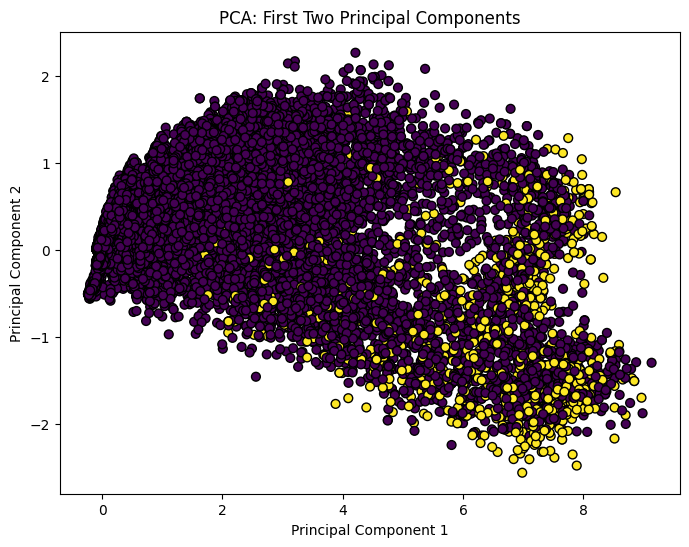

In [80]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Map class labels to numeric values
le = LabelEncoder()
y_numeric = le.fit_transform(y)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [22]:
# Map 'pos' to 1 and 'neg' to 0
y_binary = df['class'].map({'neg': 0, 'pos': 1})
print(y_binary)


0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: class, Length: 60000, dtype: int64


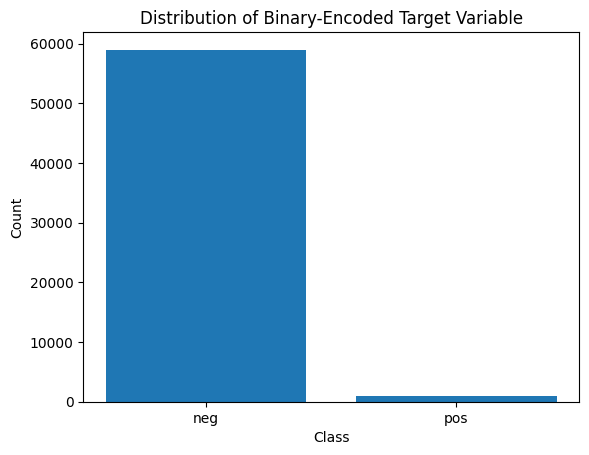

In [23]:
import matplotlib.pyplot as plt

# Plot the distribution of y_binary
plt.bar(y_binary.value_counts().index, y_binary.value_counts())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Binary-Encoded Target Variable')
plt.xticks([0, 1], ['neg', 'pos'])
plt.show()


In [24]:
S_W = np.sum([np.cov(X_pca[y_binary == label], rowvar=False) for label in np.unique(y_binary)], axis=0)


In [25]:
S_W_arr = np.array(S_W)

# Calculate the determinant
det_S_W = np.linalg.det(S_W_arr)

# Check if the determinant is non-zero
if det_S_W != 0:
    print("The within-class scatter matrix is invertible.")
else:
    print("The within-class scatter matrix is not invertible.")

The within-class scatter matrix is invertible.


In [26]:
# Calculate mean of features for each class
mean_class_1 = X_pca[y_binary == 0].mean(axis=0)
print(mean_class_1.shape)
print(mean_class_1)
mean_class_2 = X_pca[y_binary == 1].mean(axis=0)
print(mean_class_2)

(27,)
[-8.32717366e-02 -1.67789427e-02  1.23491436e-03 -3.98805467e-03
  1.15515462e-03  5.70306714e-03 -2.90613913e-03 -4.31029904e-04
  1.98937409e-03 -1.95737255e-03 -1.26622310e-03 -3.79330663e-03
 -7.94062298e-04 -1.45808076e-03  5.95775436e-04  2.63870818e-03
  6.68091370e-04  3.21562752e-03  1.80583063e-03  1.24520934e-03
 -1.53836474e-03 -1.29856662e-03 -3.11435941e-03  5.22258960e-05
  4.40141616e-04 -1.95258055e-03 -8.50261863e-04]
[ 4.91303246e+00  9.89957618e-01 -7.28599472e-02  2.35295225e-01
 -6.81541226e-02 -3.36480961e-01  1.71462209e-01  2.54307643e-02
 -1.17373072e-01  1.15484981e-01  7.47071630e-02  2.23805091e-01
  4.68496756e-02  8.60267650e-02 -3.51507507e-02 -1.55683782e-01
 -3.94173908e-02 -1.89722024e-01 -1.06544007e-01 -7.34673511e-02
  9.07635199e-02  7.66154307e-02  1.83747205e-01 -3.08132787e-03
 -2.59683553e-02  1.15202253e-01  5.01654499e-02]


In [27]:
mean_class_1 = mean_class_1.reshape(-1, 1)
mean_class_2 = mean_class_2.reshape(-1, 1)
S_B = ((mean_class_1-mean_class_2) @ (mean_class_1-mean_class_2).T)
print(S_B.shape)

(27, 27)


In [28]:
are_all_real = np.all(np.isreal(S_B))

if are_all_real:
    print("All values in S_B are real.")
else:
    print("S_B contains complex values.")

All values in S_B are real.


In [29]:
# Check if S_B is symmetric
is_symmetric = np.array_equal(S_B, S_B.T)

if is_symmetric:
    print("S_B is symmetric.")
else:
    print("S_B is not symmetric.")

S_B is symmetric.


In [30]:
def imaginary_entries(name,M):
    has_imaginary_values = np.any(np.iscomplex(M))

    if has_imaginary_values:
        # Set a tolerance for considering imaginary parts as negligible
        tolerance = 1e-1

        # Check if the absolute values of imaginary parts are smaller than the tolerance
        is_imaginary_small = np.all(np.abs(np.imag(M)) < tolerance)

        if is_imaginary_small:
            print(f"{name} has small imaginary values and can be considered real.")
        else:
            print(f"{name} has significant imaginary values.")
    else:
        print(f"{name} does not have imaginary values.")
   

In [31]:
def checknumericalerror(name,M):
    eigenvalues, _ = np.linalg.eig(M)
    #print(eigenvalues)
    # Check if any eigenvalue has an imaginary component
    if np.any(np.iscomplex(eigenvalues)):
        print(f"matrix {name} has imaginary eigenvalues.")
    else:
        print(f"matrix {name} does not have imaginary eigenvalues.")
        
    if np.any(np.abs(np.imag(eigenvalues)) > 1e-10):
        print(f"matrix {name} has big imaginary eigenvalues.")
    else:
        print(f"matrix {name} does not have big imaginary eigenvalues.")

checknumericalerror("S_B",S_B)


matrix S_B has imaginary eigenvalues.
matrix S_B does not have big imaginary eigenvalues.


All eigenvalues of a real symmetric matrix are real. How is this possible?

In [32]:
# Assuming you have already calculated S_W and S_B
# Ensure that S_W and S_B are NumPy arrays or can be converted to NumPy arrays
S_W_inv = np.linalg.inv(S_W)
checknumericalerror("S_W_inv",S_W_inv)
print(S_W_inv.shape)
print(S_B.shape)
checknumericalerror("S_B",S_B)
imaginary_entries("S_B",S_B)
real_S_B=np.real(S_B)
if np.array_equal(real_S_B, S_B):
    print("same")

multiplied_matrix= S_W_inv @ S_B
checknumericalerror("multiplied_matrix",multiplied_matrix)
imaginary_entries("multiplied_matrix",multiplied_matrix)
eigenvalues, eigenvectors = np.linalg.eig(multiplied_matrix)


# Sort the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print("Sorted Eigenvectors:", ' '.join(map(str, eigenvectors_sorted.ravel())))


# Select the top k eigenvectors (where k is the desired dimension)
k = 26
selected_eigenvectors = eigenvectors_sorted[:, :k]

# The transformation matrix is formed by stacking the selected eigenvectors
transformation_matrix = selected_eigenvectors
imaginary_entries("transformation_matrix",transformation_matrix)
real_transformation_matrix=np.real(transformation_matrix)
# Apply the transformation to your data
X_lda = X_pca @ real_transformation_matrix


matrix S_W_inv does not have imaginary eigenvalues.
matrix S_W_inv does not have big imaginary eigenvalues.
(27, 27)
(27, 27)
matrix S_B has imaginary eigenvalues.
matrix S_B does not have big imaginary eigenvalues.
S_B does not have imaginary values.
same
matrix multiplied_matrix has imaginary eigenvalues.
matrix multiplied_matrix does not have big imaginary eigenvalues.
multiplied_matrix does not have imaginary values.
Sorted Eigenvectors: (0.3472531815433792+0j) (0.01921506888335145+0j) (-0.05236531370437992+0.029892315426458052j) (-0.05236531370437992-0.029892315426458052j) (0.011213440811092818+0j) (0.059135603062519096-0.02343669269960023j) (0.059135603062519096+0.02343669269960023j) (0.011374428240903447+0j) (0.01861483933842927+0.04101083180398774j) (0.01861483933842927-0.04101083180398774j) (0.062359612163599205+0.005116603938681886j) (0.062359612163599205-0.005116603938681886j) (0.0313836245346438-0.00038309277387940476j) (0.0313836245346438+0.00038309277387940476j) (0.004497

I saw that the eigenvectors of transformation_matrix was imaginary, as it can be seen, which made the X_lda have imaginary values which was unwanted because it would be used for machine learning algortihms and it needed to have real values. But since the imaginary parts of eigenvectors were small ($<10^{-2}$), I neglected them by only taking the real part. 

In [33]:
print(X_pca.shape)
print(transformation_matrix.shape)
print(X_lda.shape)

(60000, 27)
(27, 26)
(60000, 26)


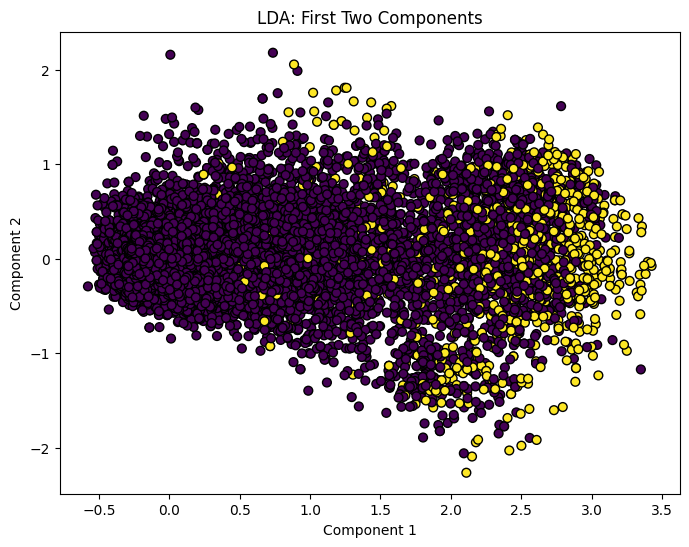

In [34]:
import matplotlib.pyplot as plt

# Plot the first two components of X_lda
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_binary, cmap='viridis', edgecolor='k', s=40)
plt.title('LDA: First Two Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


In [35]:
# Check for imaginary values in X_pca_lda
has_imaginary_values = np.any(np.iscomplex(X_lda))

print("Does X_pca_lda have imaginary values?", has_imaginary_values)


Does X_pca_lda have imaginary values? False


In [36]:
print(X_lda.shape)

(60000, 26)


In [37]:
matrix_entries = X_lda.flatten()

# Check if there are imaginary values
has_imaginary_values = np.any(np.iscomplex(matrix_entries))

if has_imaginary_values:
    # Extract imaginary parts
    imaginary_parts = np.imag(matrix_entries)

    # Find the index of the entry with the largest imaginary part
    index_max_imaginary_part = np.argmax(np.abs(imaginary_parts))

    # Get the largest imaginary part and the corresponding matrix entry
    largest_imaginary_part = imaginary_parts[index_max_imaginary_part]
    corresponding_entry = matrix_entries[index_max_imaginary_part]

    print("The matrix entry with the largest imaginary part:", corresponding_entry)
    print("The largest imaginary part:", largest_imaginary_part)
else:
    print("The matrix does not have imaginary values.")

The matrix does not have imaginary values.


In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


X_lda = np.array(X_lda)
y_binary = np.array(y_binary)

# Define the neural network classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)

# Use Stratified K-Fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
accuracy_scores = cross_val_score(mlp_classifier, X_lda, y_binary, cv=stratified_kfold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", accuracy_scores)

# Print the mean and standard deviation of accuracy scores
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation of Accuracy:", np.std(accuracy_scores))


Cross-Validation Accuracy Scores: [0.99066667 0.98908333 0.99041667 0.99208333 0.99      ]
Mean Accuracy: 0.99045
Standard Deviation of Accuracy: 0.0009783773414292804


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

# Fit the classifier on the entire dataset for detailed analysis
mlp_classifier.fit(X_lda, y_binary)

# Get predictions on the entire dataset
y_pred = mlp_classifier.predict(X_lda)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_binary, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(y_binary, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[58933    67]
 [  249   751]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       0.92      0.75      0.83      1000

    accuracy                           0.99     60000
   macro avg       0.96      0.87      0.91     60000
weighted avg       0.99      0.99      0.99     60000



In [40]:
import joblib

joblib.dump(mlp_classifier, 'mlp_model.joblib')

['mlp_model.joblib']

In [41]:
test_data = pd.read_csv('aps_failure_test_set.csv')
print(test_data)

          id  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0          1      60      0          20     12      0      0      0      0   
1          2      82      0          68     40      0      0      0      0   
2          3   66002      2         212    112      0      0      0      0   
3          4   59816     na        1010    936      0      0      0      0   
4          5    1814     na         156    140      0      0      0      0   
...      ...     ...    ...         ...    ...    ...    ...    ...    ...   
15995  15996   81852     na  2130706432    892      0      0      0      0   
15996  15997      18      0          52     46      8     26      0      0   
15997  15998   79636     na        1670   1518      0      0      0      0   
15998  15999     110     na          36     32      0      0      0      0   
15999  16000       8      0           6      4      2      2      0      0   

      ag_002  ...  ee_002  ee_003  ee_004  ee_005   ee_006  ee_

In [42]:
test_data_num= test_data.apply(pd.to_numeric, errors='coerce')
test_data_num.fillna(test_data_num.mean(), inplace=True)
nan_values = test_data_num.isna().any().any()

if nan_values:
    print("The data contains NaN values.")
else:
    print("The data does not contain NaN values.")


The data does not contain NaN values.


In [ ]:
# Identify features where min equals max
constant_features_mask = test_data_num.min() == test_data_num.max()
constant_features = test_data_num.columns[constant_features_mask]

# Print the features where min equals max (constant features)
print("Features where min equals max (constant features):")
print(constant_features)

# Remove constant features from the DataFrame
test_data_num.drop(columns=constant_features, inplace=True)

# Display the DataFrame without constant features
print("\nDataFrame without constant features:")
print(test_data_num)

Features where min equals max (constant features):
Index([], dtype='object')

DataFrame without constant features:
          id  aa_000    ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0          1      60  0.000000  2.000000e+01    12.0     0.0     0.0     0.0   
1          2      82  0.000000  6.800000e+01    40.0     0.0     0.0     0.0   
2          3   66002  2.000000  2.120000e+02   112.0     0.0     0.0     0.0   
3          4   59816  0.772065  1.010000e+03   936.0     0.0     0.0     0.0   
4          5    1814  0.772065  1.560000e+02   140.0     0.0     0.0     0.0   
...      ...     ...       ...           ...     ...     ...     ...     ...   
15995  15996   81852  0.772065  2.130706e+09   892.0     0.0     0.0     0.0   
15996  15997      18  0.000000  5.200000e+01    46.0     8.0    26.0     0.0   
15997  15998   79636  0.772065  1.670000e+03  1518.0     0.0     0.0     0.0   
15998  15999     110  0.772065  3.600000e+01    32.0     0.0     0.0     0.0   
15999

In [61]:
print(test_data_num.shape)
print(X_numeric_normalized.shape)

(16000, 171)
(60000, 169)


In [ ]:
test_pca = np.dot(test_data_num, top_eigenvectors)

print("Shape of X_pca:", test_pca.shape)

Shape of X_pca: (16000, 27)


In [ ]:
test_lda= test_pca @ real_transformation_matrix

print(test_lda.shape)

imaginary_entries("test_lda",test_lda)


(16000, 26)
test_lda does not have imaginary values.


In [ ]:
predictions = mlp_classifier.predict(test_lda)

In [ ]:
import pandas as pd

# Assuming 'predictions' is an array of predicted labels and 'test_lda' is the LDA-transformed test data
# Convert numeric predictions to 'neg' and 'pos'
predicted_labels = ['neg' if label == 0 else 'pos' for label in predictions]

# Create a DataFrame for submission
submission_df = pd.DataFrame({'id': range(1, len(predictions) + 1), 'Predicted': predicted_labels})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [44]:
def factor_analysis_explained_variance(X, explained_variance_threshold):
    """
    Perform Factor Analysis using spectral decomposition with an explained variance threshold.

    Parameters:
    - X: 2D NumPy array where each row represents an example, and each column represents a feature.
    - explained_variance_threshold: Desired threshold for explained variance ratio.

    Returns:
    - Loadings matrix: Matrix representing the relationship between observed variables and latent factors.
    """
    # Compute covariance matrix C_X
    cov_matrix = np.cov(X, rowvar=False)

    # Perform spectral decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Calculate explained variance ratio
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

    # Determine the number of factors based on the explained variance threshold
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    
    # Initialize the number of factors
    num_factors = 0

    # Accumulate factors until the explained variance threshold is reached
    for cumulative_variance in cumulative_explained_variance:
        if cumulative_variance >= explained_variance_threshold:
            break
        num_factors += 1

    # Factor loading matrix V
    loadings_matrix = eigenvectors[:, :num_factors]

    return loadings_matrix


# Example usage:
explained_variance_threshold = 0.95  
loadings_matrix = factor_analysis_explained_variance(X_numeric_normalized, explained_variance_threshold)


In [51]:
imaginary_entries("test_data_num", loadings_matrix)
print(X_numeric_normalized.shape)

test_data_num does not have imaginary values.
(60000, 169)


In [53]:
X_numeric_normalised = np.array(X_numeric_normalized)
loading_matrix = np.array(loadings_matrix)

# Apply the transformation
X_transformed = np.dot(X_numeric_normalised, loading_matrix)

# Print the shape of the transformed matrix
print("Shape of X_transformed:", X_transformed.shape)

Shape of X_transformed: (60000, 50)


In [56]:
print("Shape of y_binary:", y_binary.shape)

Shape of y_binary: (60000,)


In [57]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np


loadings_matrix = np.array(X_transformed)
y_binary = np.array(y_binary)

# Define the neural network classifier with 5 hidden layers
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=500)

# Use Stratified K-Fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
accuracy_scores = cross_val_score(mlp_classifier, loadings_matrix, y_binary, cv=stratified_kfold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", accuracy_scores)

# Print the mean and standard deviation of accuracy scores
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation of Accuracy:", np.std(accuracy_scores))


Cross-Validation Accuracy Scores: [0.99266667 0.992      0.99233333 0.99191667 0.99233333]
Mean Accuracy: 0.99225
Standard Deviation of Accuracy: 0.0002687419249432898


In [62]:
# Find the dropped columns
dropped_columns = np.setdiff1d(test_data_num.columns, X_numeric_normalized.columns)

# Drop the corresponding columns from test_data_num
test_data_num = test_data_num.drop(columns=dropped_columns, axis=1)

# Print the updated shape of test_data_num
print("Shape of test_data_num after dropping columns:", test_data_num.shape)

Shape of test_data_num after dropping columns: (16000, 169)


In [63]:
test_data_arr = np.array(test_data_num)
# Apply the transformation
factor_test = np.dot(test_data_arr, loading_matrix)

In [66]:
mlp_classifier.fit(loadings_matrix, y_binary)

MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=500)

In [67]:
predictions=mlp_classifier.predict(factor_test)

In [68]:
# Convert numeric predictions to 'neg' and 'pos'
predicted_labels = ['neg' if label == 0 else 'pos' for label in predictions]

# Create a DataFrame for submission
submission_df = pd.DataFrame({'id': range(1, len(predictions) + 1), 'Predicted': predicted_labels})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [70]:
import numpy as np

def factor_analysis_common_model(X, num_factors):
    """
    Perform Factor Analysis on the input data using the common factor model.

    Parameters:
    - X: 2D NumPy array where each row represents an example, and each column represents a feature.
    - num_factors: Number of latent factors to uncover.

    Returns:
    - Loadings matrix: Matrix representing the relationship between observed variables and latent factors.
    """
    num_examples, num_features = X.shape

    # Initialize loadings matrix (A)
    A = np.random.randn(num_features, num_factors)

    # EM algorithm for Factor Analysis (Common Factor Model)
    num_iterations = 100
    for _ in range(num_iterations):
        # E-step: Compute the posterior covariance matrix
        C_inv = np.linalg.inv(np.eye(num_factors) + A.T @ A)
        
        # M-step: Update loadings matrix
        A = X.T @ X @ A @ C_inv

    return A

# Example usage:
num_factors = 50
loadings_matrix_2 = factor_analysis_common_model(X_numeric_normalised, num_factors)


In [71]:
print(loadings_matrix_2.shape)

(169, 50)


In [72]:
X_transformed_2=np.dot(X_numeric_normalised, loadings_matrix_2)

In [73]:
print(X_transformed_2.shape)

(60000, 50)


In [74]:
factor_test = np.dot(test_data_arr, loadings_matrix_2)

In [75]:
print(factor_test.shape)

(16000, 50)


In [76]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm

X_train, X_test, y_train, y_test = train_test_split(X_transformed_2, y_binary, test_size=0.2, random_state=42)

# Define the Neural Network model
model = MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=500, random_state=42)

# Train the model with a progress bar
num_epochs = 50  # Adjust the number of epochs as needed
for epoch in tqdm(range(num_epochs), desc="Training Neural Network"):
    model.partial_fit(X_train, y_train, classes=np.unique(y_binary),)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)

# Assuming 'factor_test' is your test data for predictions
# Make predictions on the test set
predictions = model.predict(factor_test)


Training Neural Network: 100%|██████████| 50/50 [00:43<00:00,  1.16it/s]

Accuracy on Test Set: 0.99


In [77]:
predicted_labels = ['neg' if label == 0 else 'pos' for label in predictions]

# Create a DataFrame for submission
submission_df = pd.DataFrame({'id': range(1, len(predictions) + 1), 'Predicted': predicted_labels})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

The best results were gotten from pca after lda, thus factor analysis was not used.